In [1]:
## import modules/packages 
import os 
import numpy as np
import matplotlib.pyplot as plt # the basic plotting library

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # to make the fonts in the PDF figures editable
rcParams['font.sans-serif'] = 'Arial' # and standard

from parsers import parse_soft

In [2]:
### 0. Prepare some gene expression data to play with
## 0.1. Get the data
mat, genes, samples = parse_soft('GDS1001.soft')
mat = np.log2(mat+1.) # log transform the data
## 0.2. Peek the data
print('shape of the matrix:', mat.shape)
print('number of genes:', len(genes))
print('number of samples:', len(samples))
print(samples)
samples = ['wt1','wt2', 'het1','het2']


('shape of the matrix:', (12422L, 4L))
('number of genes:', 12422)
('number of samples:', 4)
['GSM19023', 'GSM19024', 'GSM19025', 'GSM19026']


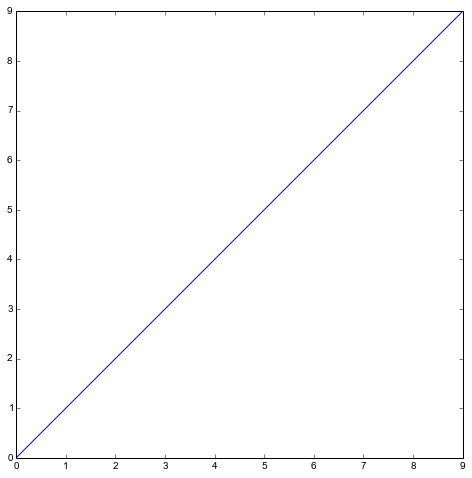

In [3]:
### 1. Plot with Matplotlib
## 1.0. Initialize a figure
%matplotlib inline
fig = plt.figure(figsize=(8,8)) # the figure
ax = fig.add_subplot(111) # the axes on the figure
ax.plot(np.arange(10), np.arange(10))
plt.show()

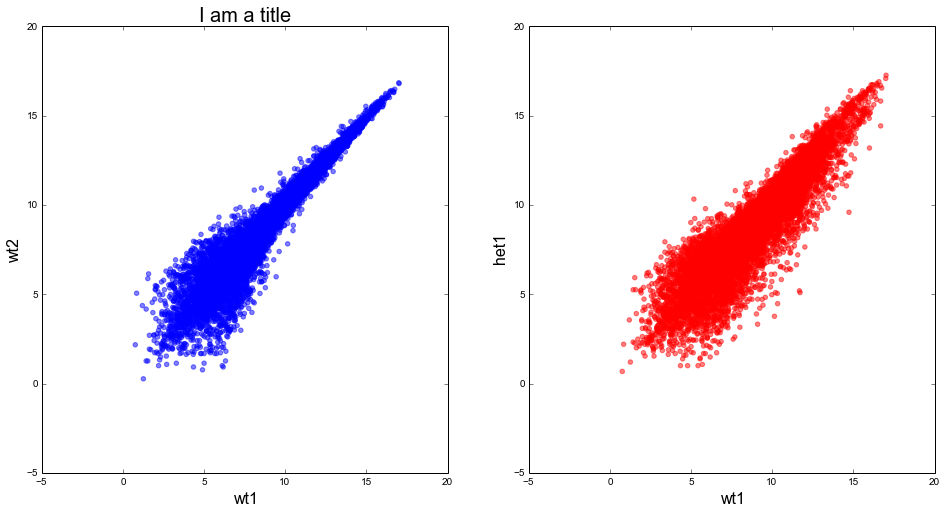

In [4]:
fig = plt.figure(figsize=(16,8)) # the figure 
ax1 = fig.add_subplot(121) # figure with two axes
ax2 = fig.add_subplot(122)

# 1.1. scatter plot 
ax1.scatter(mat[:,0], mat[:, 1], color='b', alpha=0.5) # gene expression between wt1 and wt2
ax2.scatter(mat[:,0], mat[:, 2], color='r', alpha=0.5) # gene expression between wt1 and het1

ax1.set_xlabel(samples[0], fontsize=16) # add labels
ax1.set_ylabel(samples[1], fontsize=16)

ax2.set_xlabel(samples[0], fontsize=16)
ax2.set_ylabel(samples[2], fontsize=16)

ax1.set_title('I am a title', fontsize=20)
plt.show()

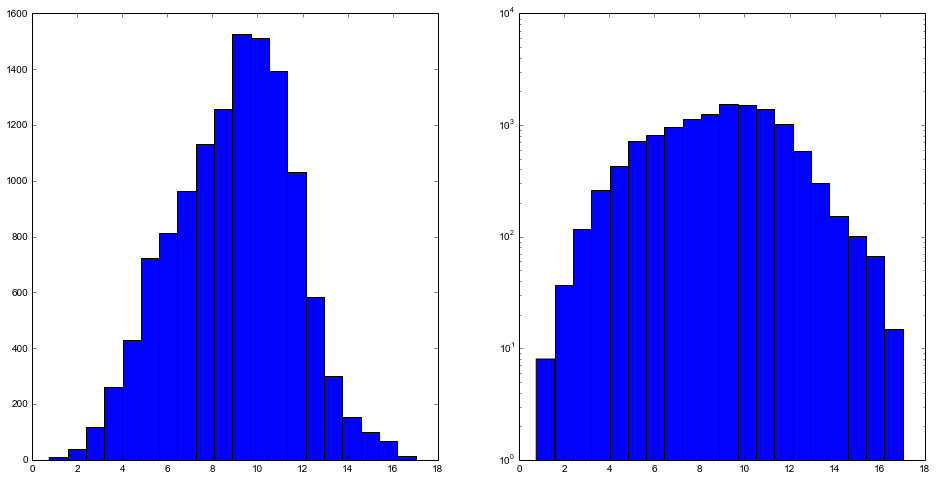

In [5]:
fig = plt.figure(figsize=(16,8)) # the figure 
ax1 = fig.add_subplot(121) # figure with two axes
ax2 = fig.add_subplot(122)

## 1.2. histogram
ax1.hist(mat[:,0], bins=20) # gene expression values in wt1
ax2.hist(mat[:,0], bins=20, log=True) # gene expression values in wt1
plt.show()

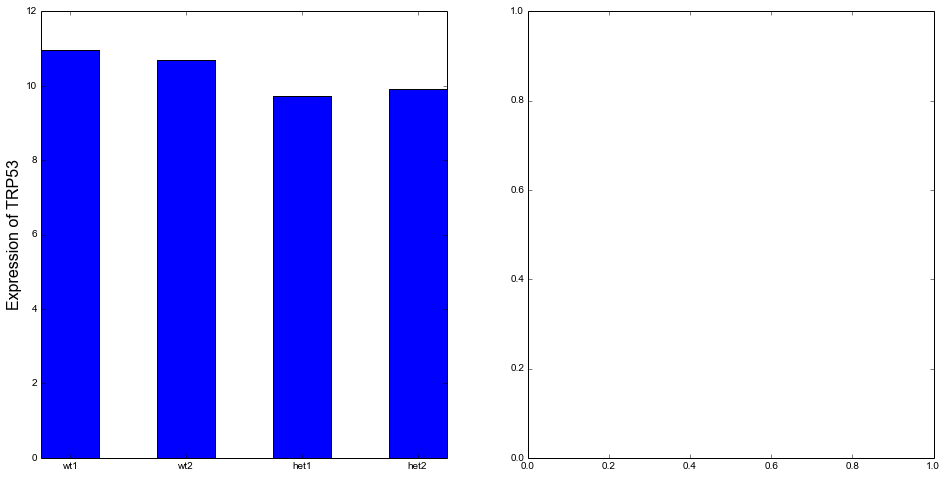

In [6]:
fig = plt.figure(figsize=(16,8)) # the figure 
ax1 = fig.add_subplot(121) # figure with two axes
ax2 = fig.add_subplot(122)

## 1.3. bar plot

gene = 'TRP53' # a gene we want to plot
idx = genes.index(gene)

positions = np.arange(4) # positions of the bars [0,1,2,3]
width = 0.5 # width of the bars

ax1.bar(positions, mat[idx], width)
ax1.set_xticks(positions+ 0.5 * width)
ax1.set_xticklabels(samples)
ax1.set_ylabel('Expression of ' + gene, fontsize=16)

plt.show()

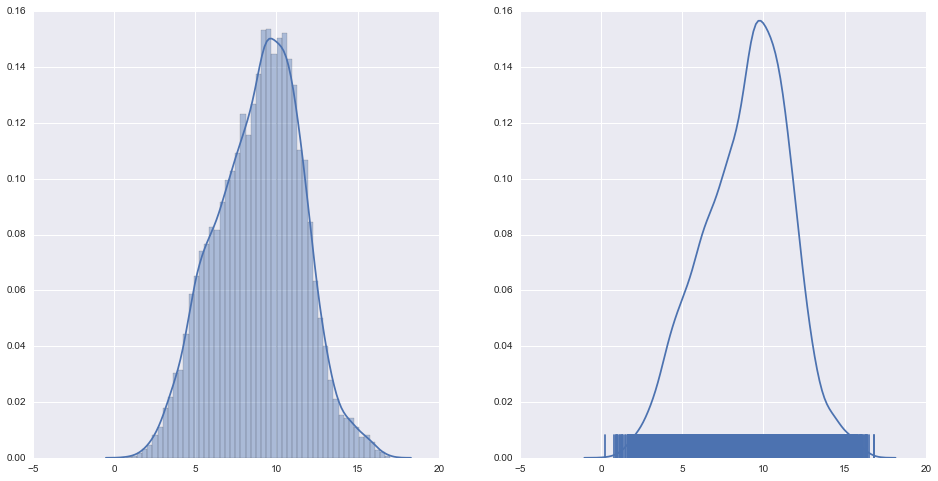

In [7]:
### 2. Introducing Seaborn
import seaborn as sns

## 2.0. distplot, fancier histogram
fig = plt.figure(figsize=(16,8)) # the figure 
ax1 = fig.add_subplot(121) # figure with two axes
ax2 = fig.add_subplot(122)

sns.distplot(mat[:,0], ax=ax1)
sns.distplot(mat[:,1], rug=True, hist=False, ax=ax2)
plt.show()


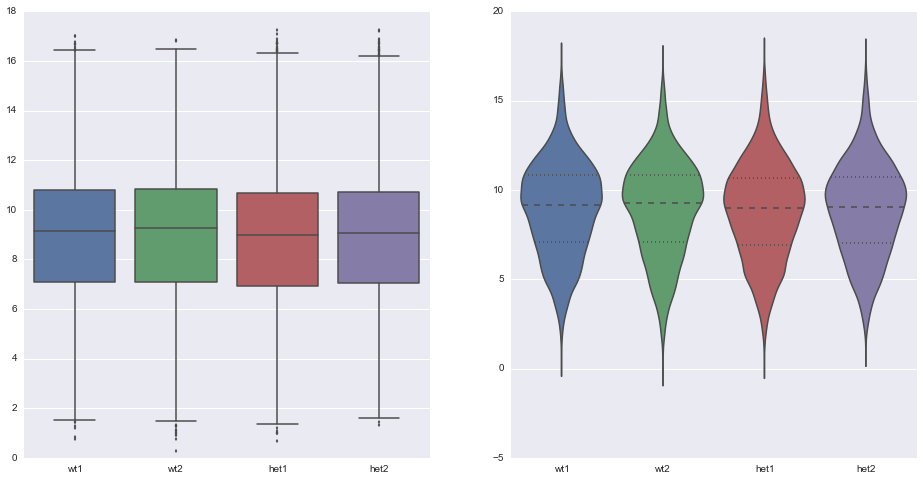

In [8]:
fig = plt.figure(figsize=(16,8)) # the figure 
ax1 = fig.add_subplot(121) # figure with two axes
ax2 = fig.add_subplot(122)

sns.boxplot(mat, names=samples, ax=ax1)
sns.violinplot(mat, names=samples, ax=ax2)
plt.show()

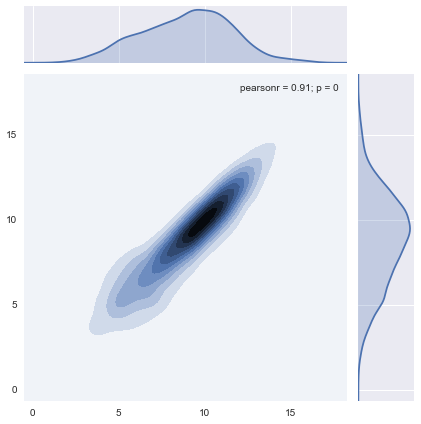

In [9]:
## 2.2. jointplot
## Docs: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html
sns.jointplot(mat[:,0], mat[:,2] , kind="kde")
plt.show()


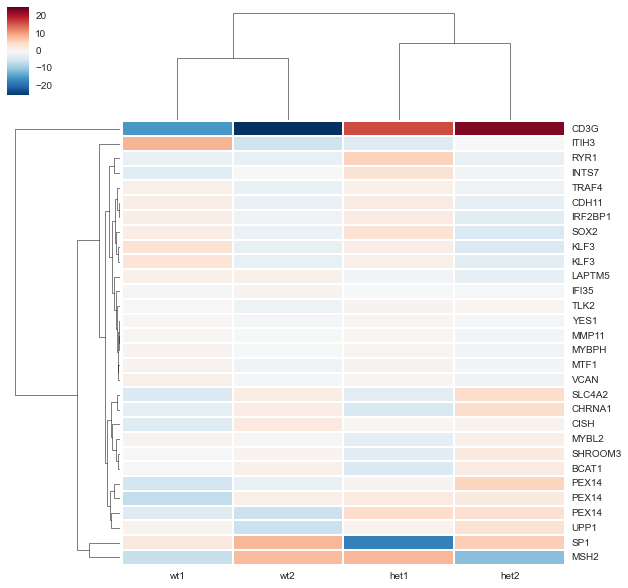

In [10]:
## 2.3 Hierarchical clustering plot
## Docs: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.clustermap.html

sns.clustermap(mat[0:30], yticklabels=genes[0:30], xticklabels=samples,
	z_score=0, # to ensure that each gene (row) has mean of 0 and variance of 1 across samples
	method='average', # linkage function
	metric='euclidean' # distance function
	)
plt.show()


In [ ]:
### 3. Introducing mpld3
import mpld3

fig = plt.figure(figsize=(8,8)) # the figure
ax = fig.add_subplot(111) # the axes on the figure

## 3.1. scatter plot with tooltip
scatter = ax.scatter(mat[0:50,0], mat[0:50,3],alpha=0.5) # scatter plot of the first 50 genes in wt1 and het1 
labels = genes[0:50] # labels of the first 50 genes

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels) # add tooltip
mpld3.plugins.connect(fig, tooltip)

ax.set_xlabel(samples[0], fontsize=16)
ax.set_ylabel(samples[2], fontsize=16)

# mpld3.show()
mpld3.save_html(fig, 'test.html')
